<a href="https://colab.research.google.com/github/syildirim0/machine_learning/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/master/2.gorsellestirme/data/flight.csv')

In [ ]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,time_hour
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,1400,2013-01-01 05:00:00
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,1416,2013-01-01 05:00:00
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,1089,2013-01-01 05:00:00
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,1576,2013-01-01 05:00:00
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,762,2013-01-01 06:00:00


In [ ]:

df.time_hour=pd.to_datetime(df.time_hour)
df.month=df.time_hour.dt.month
df.day=df.time_hour.dt.day
df.hour= df.time_hour.dt.hour
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,time_hour,month,day,hour,day_of_week
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,1400,2013-01-01 05:00:00,1,1,5,1
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,1416,2013-01-01 05:00:00,1,1,5,1
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,1089,2013-01-01 05:00:00,1,1,5,1
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,1576,2013-01-01 05:00:00,1,1,5,1
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,762,2013-01-01 06:00:00,1,1,6,1


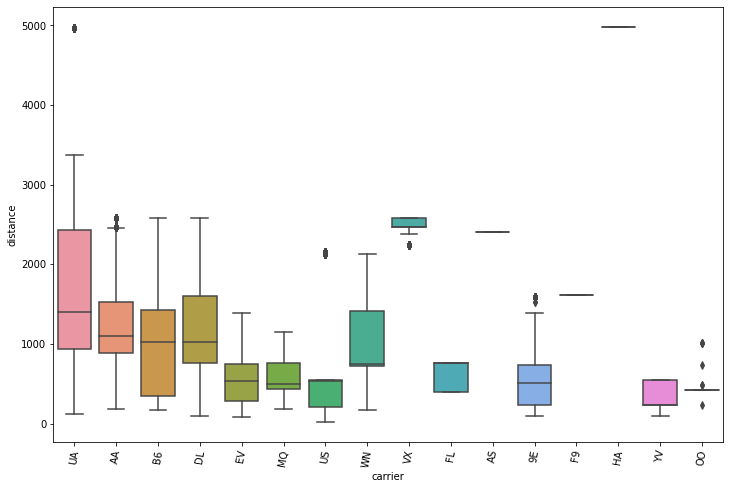

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x="carrier", y= "distance", data=df)
plt.xticks(rotation=80)
plt.show()

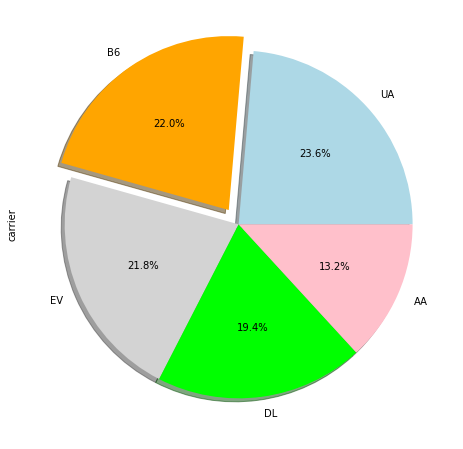

In [ ]:

plt.figure(figsize=(8,8))
explode = (0, 0.1,0,0,0)
colors=['lightblue','orange','lightgrey', 'lime', 'pink']

df.carrier.value_counts()[df.carrier.value_counts()>30000].plot.pie(autopct='%1.1f%%', shadow=True, 
                                 explode = explode,colors=colors)
plt.show()

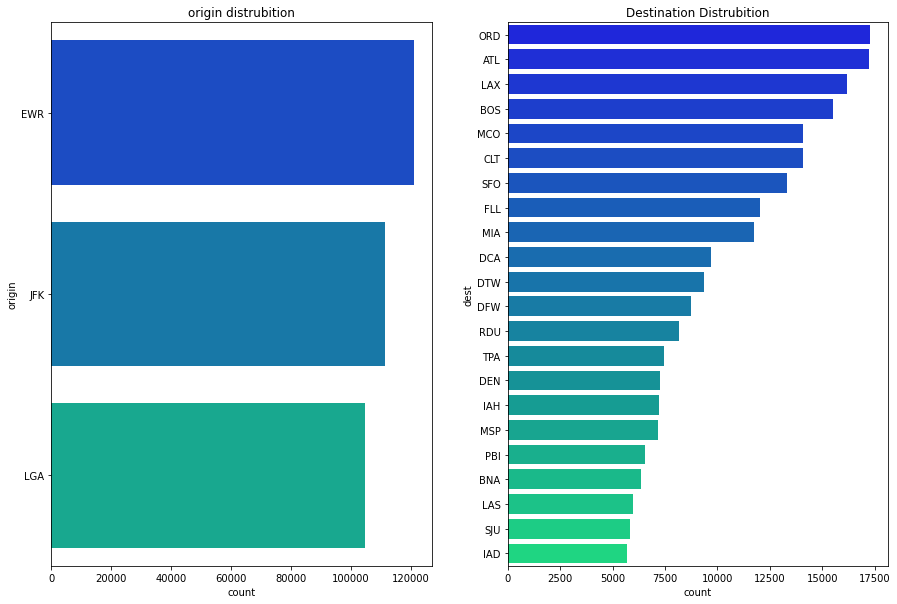

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,10))
sns.countplot(y=df.origin,order=df.origin.value_counts().index,ax=ax[0],palette='winter')
ax[0].set_title('origin distrubition')
sns.countplot(y=df.dest,order=df.dest.value_counts()[df.dest.value_counts()>5000].index,ax=ax[1],palette='winter')
ax[1].set_title('Destination Distrubition')
plt.show()


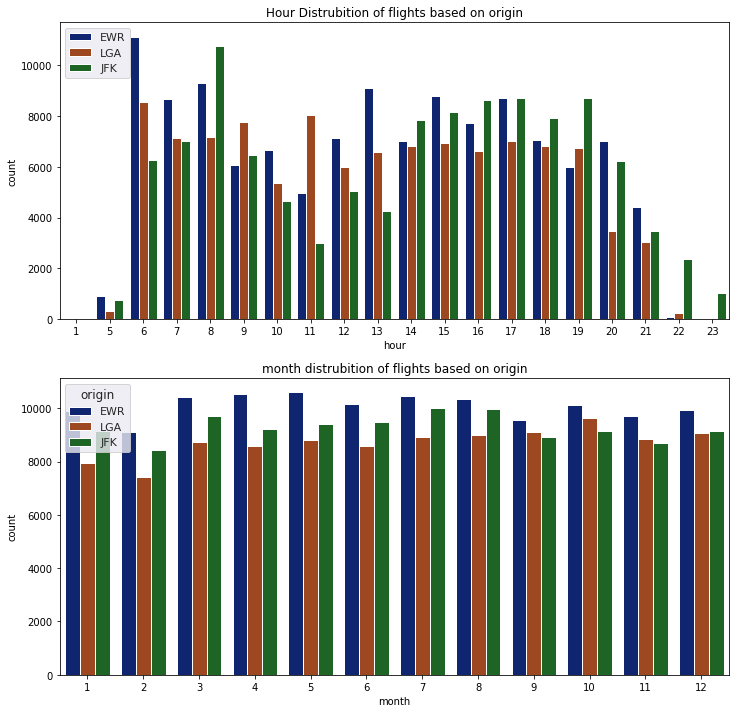

In [ ]:
f,ax=plt.subplots(2,1,figsize=(12,12))
sns.set()
ax[0].set_title('Hour Distrubition of flights based on origin')
sns.countplot(x='hour',hue='origin', data=df,ax=ax[0],palette='dark')
ax[0].legend(loc='upper left')
ax[1].set_title('month distrubition of flights based on origin')
sns.countplot(x='month',hue='origin',data=df, ax=ax[1],palette='dark')
plt.subplots_adjust(hspace=0.2)
plt.show()


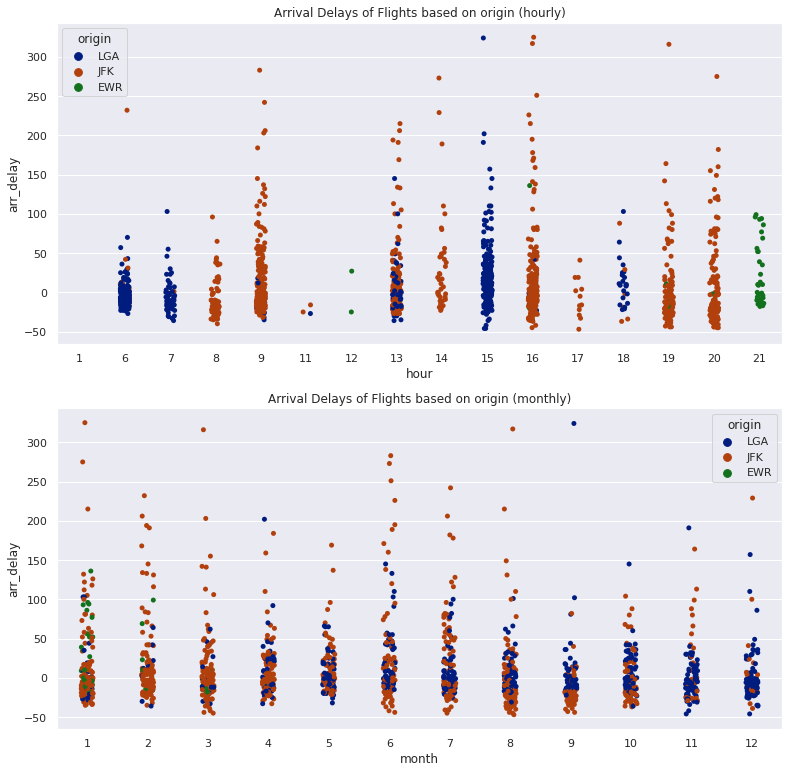

In [ ]:
f,ax= plt.subplots(2,1,figsize=(13,13))
sns.set()
df1=df[df.distance<100]
ax[0].set_title('Arrival Delays of Flights based on origin (hourly)')
sns.stripplot(x='hour', y='arr_delay', hue = 'origin', data=df1, ax = ax[0], 
                  jitter=True,  palette = 'dark')
ax[1].set_title('Arrival Delays of Flights based on origin (monthly)')
sns.stripplot(x='month', y = 'arr_delay', hue = 'origin', data=df1, ax = ax[1], 
                jitter=True, palette = 'dark')
plt.subplots_adjust(hspace=0.2)
plt.show()

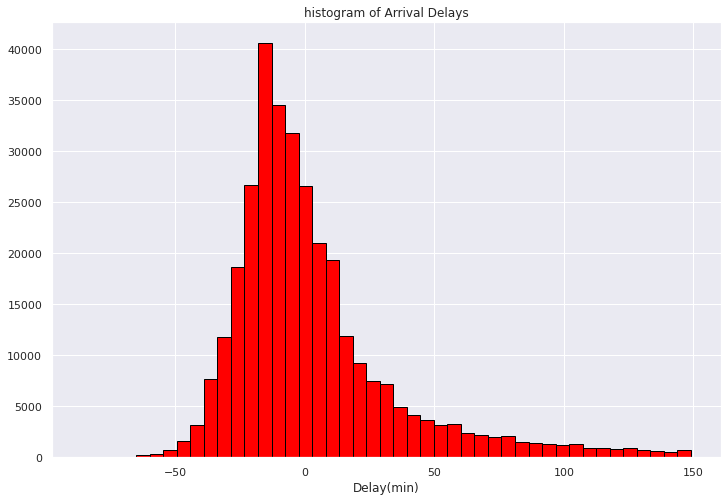

In [ ]:
plt.figure(figsize=(12,8))
df1=df[df.arr_delay<150]
plt.hist(df1.arr_delay,bins=int(180/4),edgecolor='black',color='red')
plt.title('histogram of Arrival Delays')
plt.xlabel('Delay(min)')
plt.show()

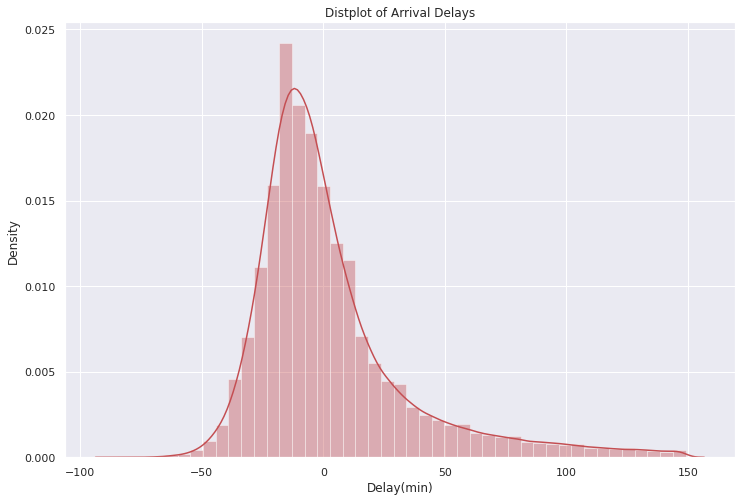

In [ ]:

plt.figure(figsize=(12,8))
sns.distplot(df1['arr_delay'] , bins=int(180/4),color='r')
plt.title('Distplot of Arrival Delays')
plt.xlabel('Delay(min)')
plt.show()

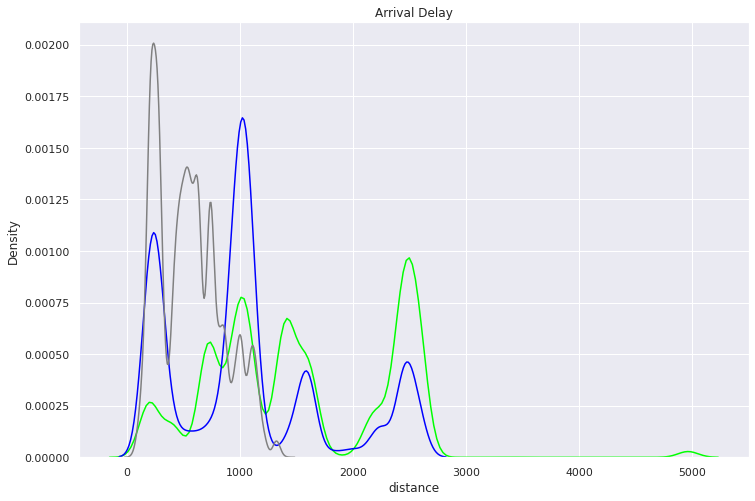

In [ ]:




plt.figure(figsize=(12,8))
sns.kdeplot(df[(df.carrier=='UA')].distance,color = 'lime',label = 'UA')
sns.kdeplot(df[(df.carrier=='B6')].distance, color = 'blue',label = 'B6')
sns.kdeplot(df[(df.carrier=='EV')].distance,color = 'grey',label = 'EV')
plt.title("Arrival Delay")
plt.show()

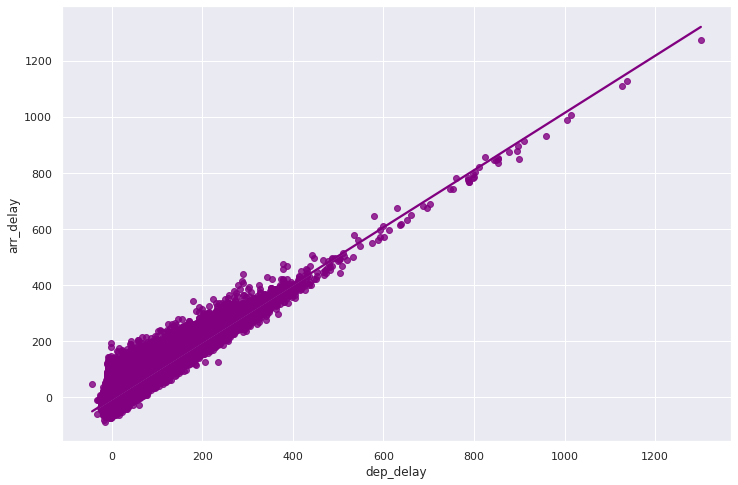

In [45]:
plt.figure(figsize=(12,8))
sns.regplot(x= df['dep_delay'], y=df['arr_delay'], color='purple')
plt.show()